   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


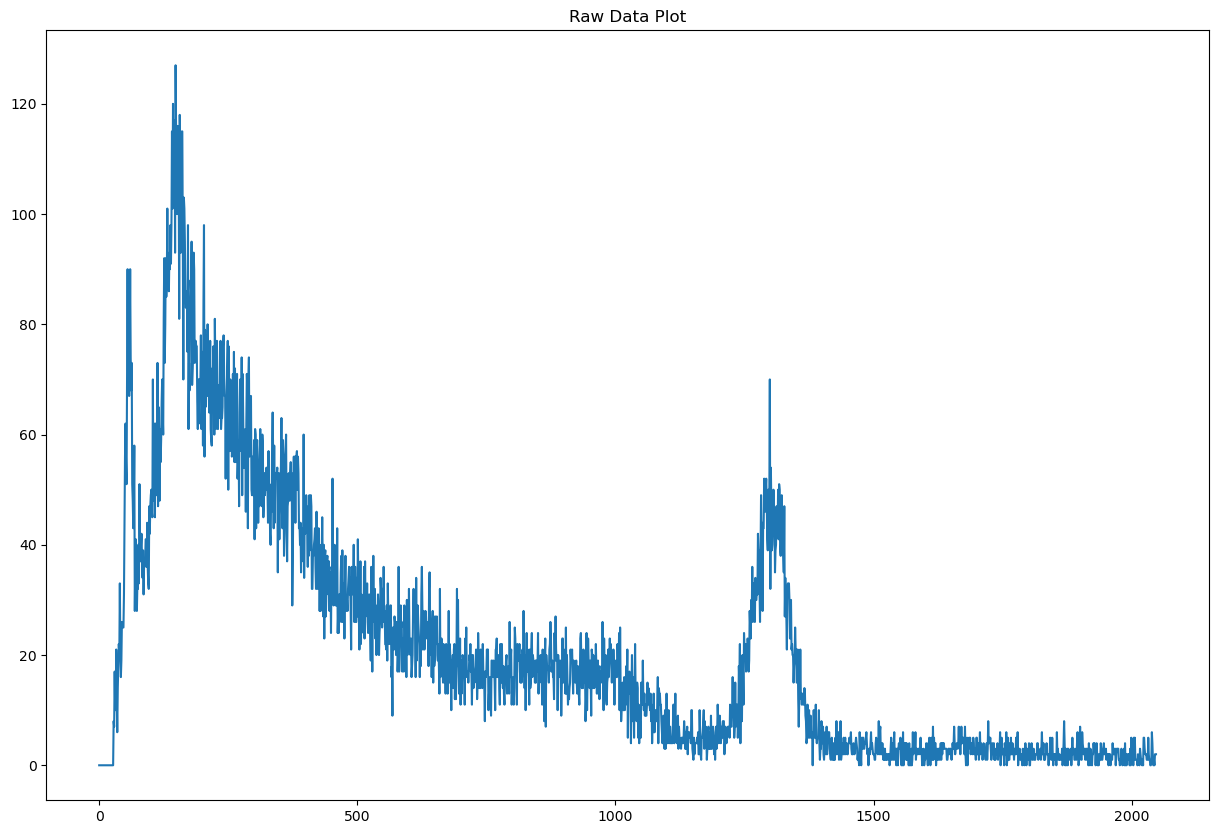

In [2]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Ba_133 = pd.read_csv("Mn_54.csv") # create pandas dataframe
print(df_Ba_133.head()) # print first 5 rows


##############
# Plot data
##############

x_Ba_133 = df_Ba_133["Channel"] # grab column
y_Ba_133 = df_Ba_133["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("")
plt.ylabel("")
plt.title("Raw Data Plot")
plt.plot(x_Ba_133, y_Ba_133)
plt.show()